In [12]:
import os
import numpy as np
from PIL import Image as IMG
import utils.img_utils as iu
from skimage.morphology import skeletonize
import networkx as nx
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
file = '02_test.png'

In [3]:
arr = np.array(IMG.open(file))

In [4]:
raw = arr.copy()
raw[raw<128] = 0
raw[raw>=128] = 255
raw[raw==255] = 1
raw = iu.remove_connected_comp(raw, 20)

In [5]:
sk = (skeletonize(raw)*255).astype(np.uint8)

In [6]:
graph = nx.Graph()

In [7]:
Xs, Ys = np.where(sk==255)
v_pixels = list(zip(Ys, Xs))
print(len(v_pixels))
node_pos = dict(zip(v_pixels, v_pixels))
graph.add_nodes_from(v_pixels)

8124


In [8]:
def update_edge(g, nodes, e, e1):
    if e1 in nodes and (e, e1) not in g.edges():
        g.add_edge(e, e1)

In [9]:
for i, j in v_pixels:
    n = (i, j)
    n1 = (i-1, j-1)
    n2 = (i-1, j)
    n3 = (i-1, j+1)
    n4 = (i, j-1)
    n5 = (i, j+1)
    n6 = (i+1, j-1)
    n7 = (i+1, j)
    n8 = (i+1, j+1)
    
    update_edge(graph, v_pixels, n, n1)
    update_edge(graph, v_pixels, n, n2)
    update_edge(graph, v_pixels, n, n3)
    update_edge(graph, v_pixels, n, n4)
    update_edge(graph, v_pixels, n, n5)
    update_edge(graph, v_pixels, n, n6)
    update_edge(graph, v_pixels, n, n7)
    update_edge(graph, v_pixels, n, n8)

<IPython.core.display.Javascript object>


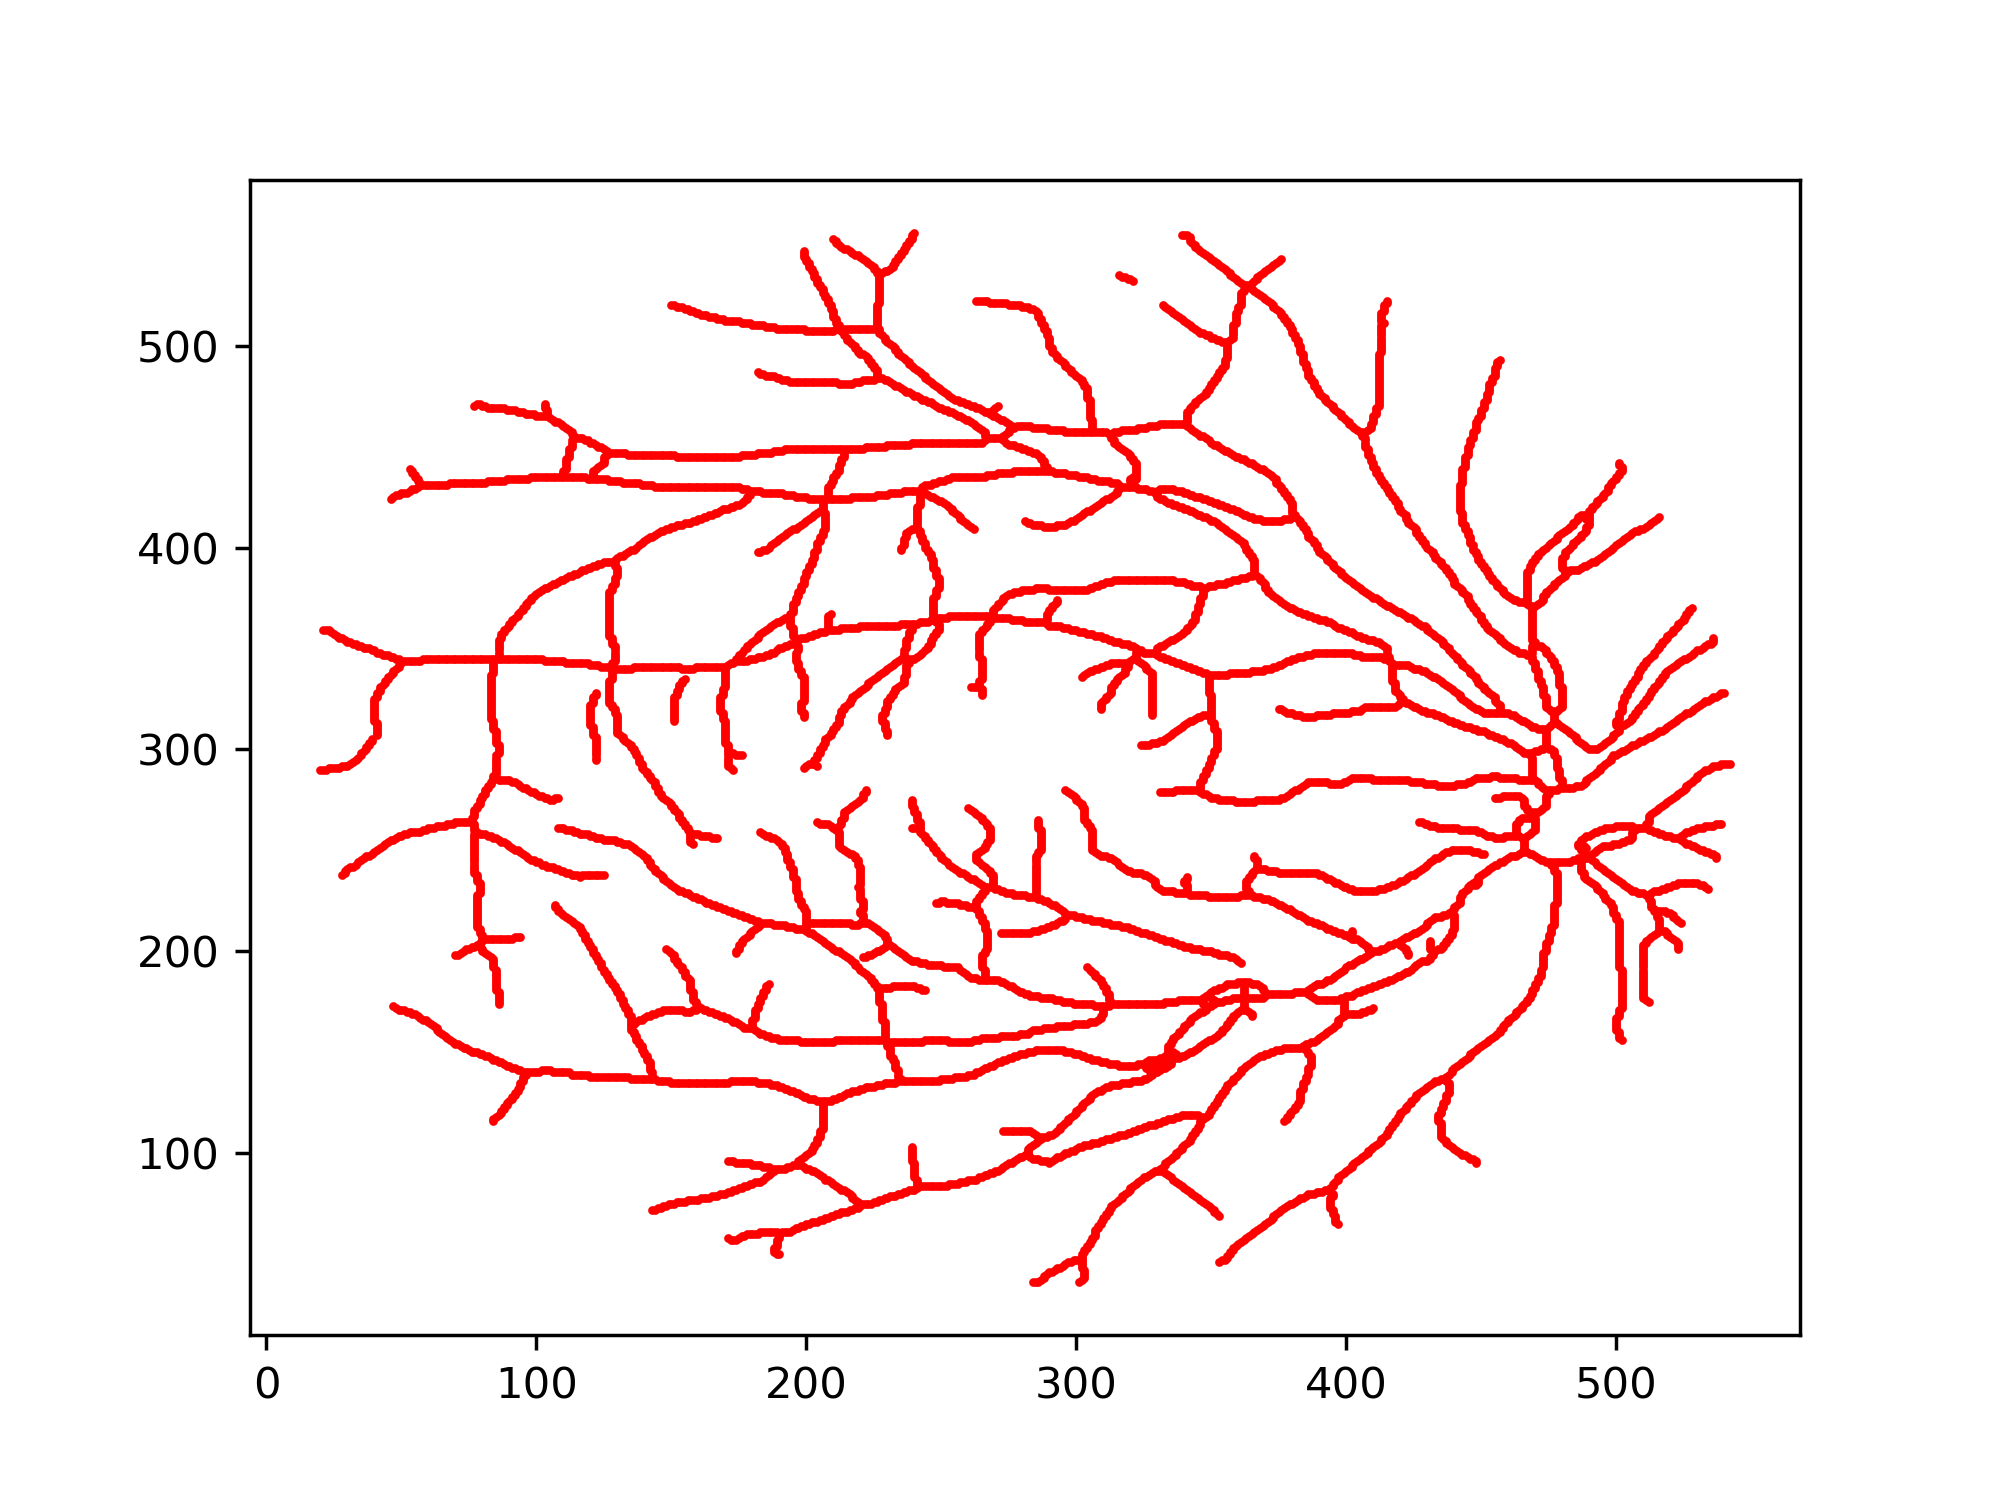

In [13]:
# plt.rcParams['figure.figsize'] = 6, 6
ps = nx.spring_layout(graph, pos=node_pos, fixed=node_pos.keys())
nx.draw_networkx(graph, node_size=1, with_labels=False, pos=ps)
plt.show()

In [75]:
t = np.zeros_like(arr)
for i, j in v_pixels:
    t[i, j] = 255

In [18]:
branches = []
for node in graph.nodes():
    neighbors = graph.edges(node)
    if len(neighbors)>2:
        branches.append(node)

In [20]:
br_img= np.zeros_like(arr)
for i, j in branches:
    br_img[j, i] = 255

In [52]:
rgb = np.zeros((br_img.shape[0], br_img.shape[1], 3), dtype=np.uint8)

In [53]:
rgb[:,:,0] = arr 
rgb[:,:,1] = arr 
rgb[:,:,2] = arr 

In [54]:
rgb[:,:,0][sk==255] = 0
rgb[:,:,1][sk==255] = 255
rgb[:,:,2][sk==255] = 0

In [55]:
rgb[:,:,0][br_img==255] = 255
rgb[:,:,1][br_img==255] = 0
rgb[:,:,2][br_img==255] = 0

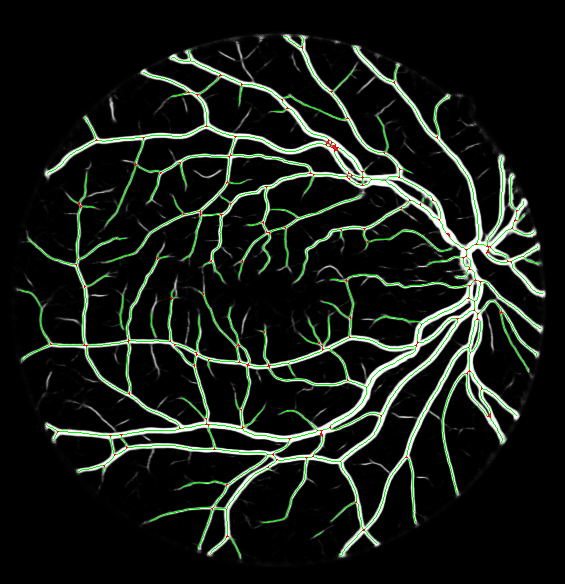

In [56]:
IMG.fromarray(rgb)